# Cadeira: Ciência de dados

## Carregando bibliotecas

In [1]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Carregando dados

In [2]:
df_dados = pd.read_csv('train.csv')

df_dados = df_dados.sample(frac=1)

df_dados.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
194,195,1,1,"Brown, Mrs. James Joseph (Margaret Tobin)",female,44.0,0,0,PC 17610,27.7208,B4,C
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
460,461,1,1,"Anderson, Mr. Harry",male,48.0,0,0,19952,26.5500,E12,S


In [3]:
df_dados_test = pd.read_csv('test.csv')

df_dados_test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# 2. Análise Exploratória

## 2.1 Informações dos dados

In [4]:
df_dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 26 to 700
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 90.5+ KB


In [5]:
df_dados.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
df_dados['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [7]:
df_dados['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [8]:
df_dados['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

## 2.2 Probabilidade de homens sobreviventes em relação a quantidade de homens total e a mesma coisa para a de mulheres

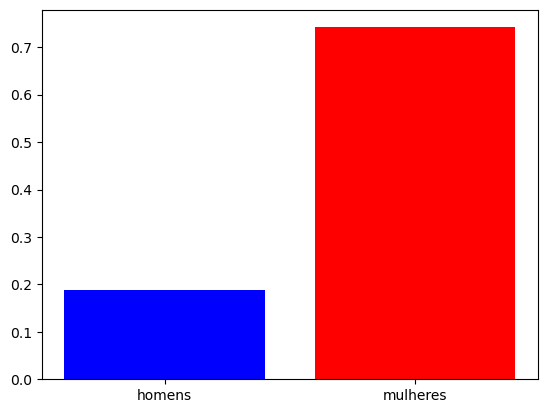

In [9]:
df_dados_male_survived = df_dados[(df_dados['Sex'] == 'male') & (df_dados['Survived'] == 1)]
df_dados_female_survived = df_dados[(df_dados['Sex'] == 'female') & (df_dados['Survived'] == 1)]

quant_male = len(df_dados[df_dados['Sex'] == 'male'])
quant_female = len(df_dados[df_dados['Sex'] == 'female'])

prob_male_survived = len(df_dados_male_survived) / quant_male
prob_female_survived = len(df_dados_female_survived) / quant_female

plt.bar(['homens', 'mulheres'], [prob_male_survived, prob_female_survived], color=['blue', 'red'])

plt.show()

## 2.3 Sobreviventes por classe de ingresso

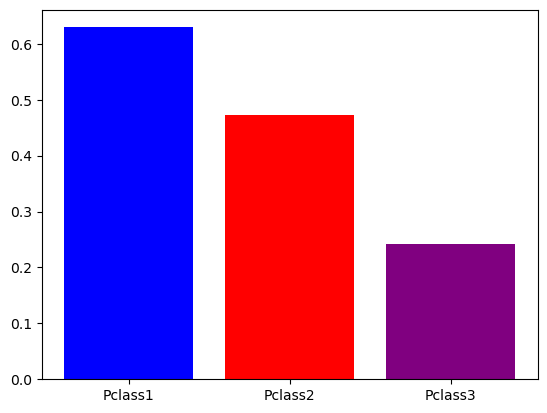

In [10]:
df_dados_survived_pclass1 = df_dados[(df_dados['Pclass'] == 1) & (df_dados['Survived'] == 1)]
df_dados_survived_pclass2 = df_dados[(df_dados['Pclass'] == 2) & (df_dados['Survived'] == 1)]
df_dados_survived_pclass3 = df_dados[(df_dados['Pclass'] == 3) & (df_dados['Survived'] == 1)]

quant_pclass1 = len(df_dados[df_dados['Pclass'] == 1])
quant_pclass2 = len(df_dados[df_dados['Pclass'] == 2])
quant_pclass3 = len(df_dados[df_dados['Pclass'] == 3])

prob_survived_pclass1 = len(df_dados_survived_pclass1) / quant_pclass1
prob_survived_pclass2 = len(df_dados_survived_pclass2) / quant_pclass2
prob_survived_pclass3 = len(df_dados_survived_pclass3) / quant_pclass3

plt.bar(['Pclass1', 'Pclass2', 'Pclass3'], [prob_survived_pclass1, prob_survived_pclass2, prob_survived_pclass3], color=['blue', 'red', 'purple'])

plt.show()

## 2.4 Sobreviventes por pontos de embarque (C, Q ou S)

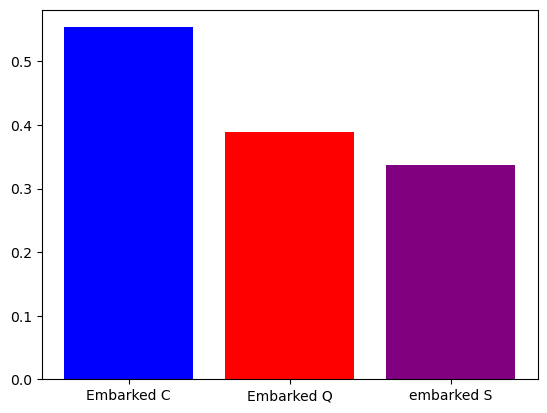

In [11]:
df_dados_survived_embarked_C = df_dados[(df_dados['Embarked'] == 'C') & (df_dados['Survived'] == 1)]
df_dados_survived_embarked_Q = df_dados[(df_dados['Embarked'] == 'Q') & (df_dados['Survived'] == 1)]
df_dados_survived_embarked_S = df_dados[(df_dados['Embarked'] == 'S') & (df_dados['Survived'] == 1)]

quant_embarked_C = len(df_dados[df_dados['Embarked'] == 'C'])
quant_embarked_Q = len(df_dados[df_dados['Embarked'] == 'Q'])
quant_embarked_S = len(df_dados[df_dados['Embarked'] == 'S'])

prob_survived_embarked_C = len(df_dados_survived_embarked_C) / quant_embarked_C
prob_survived_embarked_Q = len(df_dados_survived_embarked_Q) / quant_embarked_Q
prob_survived_embarked_S = len(df_dados_survived_embarked_S) / quant_embarked_S

plt.bar(['Embarked C', 'Embarked Q', 'embarked S'], [prob_survived_embarked_C, prob_survived_embarked_Q, prob_survived_embarked_S], color=['blue', 'red', 'purple'])

plt.show()

## 2.5 Tarifa do passageiro

### 2.5.1 Histograma da tarifa dos passageiros

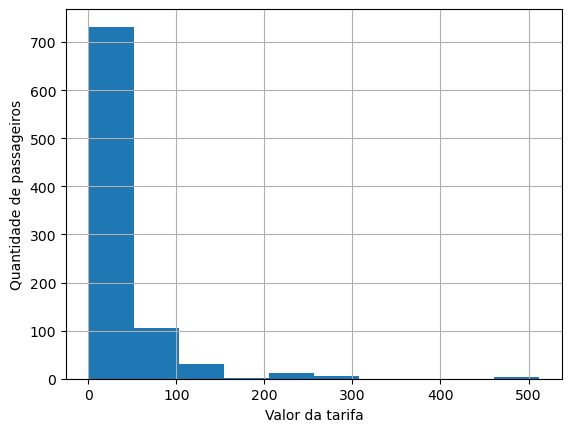

In [12]:
df_dados['Fare'].hist()

plt.xlabel("Valor da tarifa")
plt.ylabel("Quantidade de passageiros")

plt.show()

## 2.6 Idade do passageiro

### 2.6.1 Histograma da idade dos passageiros

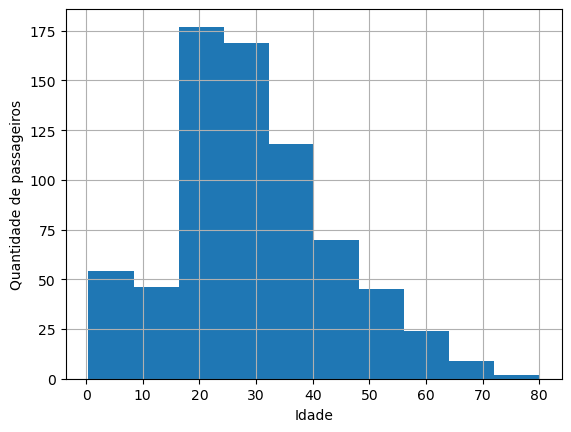

In [13]:
df_dados['Age'].hist()

plt.xlabel("Idade")
plt.ylabel("Quantidade de passageiros")

plt.show()

## 3. Preparando os dados

### Transformando variáveis categóricas ordinais em números

In [14]:
label_enconder = LabelEncoder()

obj_columns = ['Sex', 'Embarked']

for col in obj_columns:
    df_dados[col] = label_enconder.fit_transform(df_dados[col])

In [15]:
target = df_dados['Survived'].array

df_features = df_dados.drop(columns=['Survived'])

df_features

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
26,27,3,"Emir, Mr. Farred Chehab",1,NaN,0,0,2631,7.2250,NaN,0
194,195,1,"Brown, Mrs. James Joseph (Margaret Tobin)",0,44.0,0,0,PC 17610,27.7208,B4,0
21,22,2,"Beesley, Mr. Lawrence",1,34.0,0,0,248698,13.0000,D56,2
879,880,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",0,56.0,0,1,11767,83.1583,C50,0
460,461,1,"Anderson, Mr. Harry",1,48.0,0,0,19952,26.5500,E12,2
...,...,...,...,...,...,...,...,...,...,...,...
479,480,3,"Hirvonen, Miss. Hildur E",0,2.0,0,1,3101298,12.2875,NaN,2
477,478,3,"Braund, Mr. Lewis Richard",1,29.0,1,0,3460,7.0458,NaN,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
70,71,2,"Jenkin, Mr. Stephen Curnow",1,32.0,0,0,C.A. 33111,10.5000,NaN,2
